# Simulacion RPA

* Hernan Leon
* Byron Calva
* Oscar Pizarro

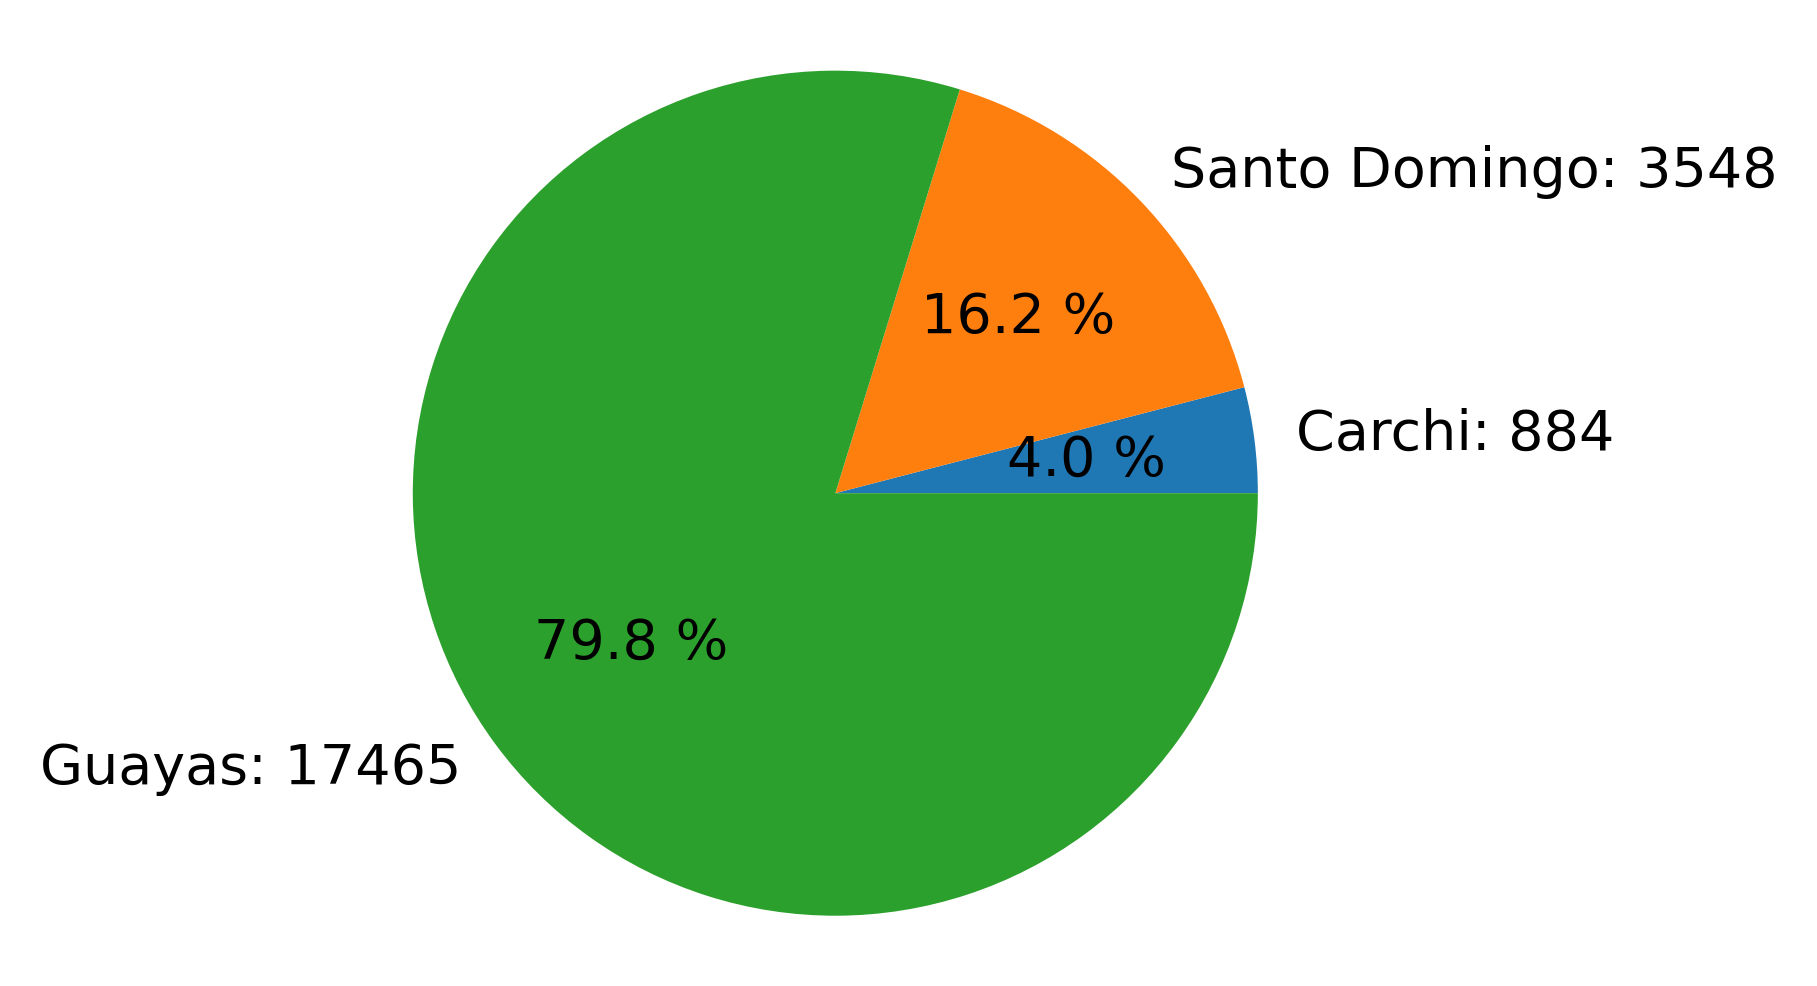

In [7]:
from reportlab.lib.pagesizes import letter as carta
from reportlab.platypus import (SimpleDocTemplate, Paragraph, PageBreak)
from datetime import datetime
from automagica import *
import pandas as pd,requests
from datetime import datetime
from matplotlib import pyplot as plt 
from bs4 import BeautifulSoup
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from wand.image import Image as wi
import time
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage
import smtplib
%matplotlib inline

#---------------------------------------------------------------------------------------------------- DATOS 
link = "https://es.wikipedia.org/wiki/Pandemia_de_enfermedad_por_coronavirus_de_2020_en_Ecuador"
datos = requests.get(link) 
tablas = pd.read_html(link)

df = tablas[2]
casos_guayas = df[df['Provincias'].isin(['Guayas'])][:]
casos_guayas.iloc[0,1] = str(casos_guayas.iloc[0,1]).replace(" ","")
casos_carchi = df[df['Provincias'].isin(['Carchi'])][:]
casos_carchi.iloc[0,1] = str(casos_carchi.iloc[0,1]).replace(" ","")
casos_stdomingo = df[df['Provincias'].isin(['Santo Domingo de los Tsáchilas'])][:]
casos_stdomingo.iloc[0,1] = str(casos_stdomingo.iloc[0,1]).replace(" ","")
 
soup =  BeautifulSoup(datos.text,features="lxml")

last_update = soup.find(id="footer-info-lastmod").string.replace(" Esta página se editó por última vez el ","Ultima actualizacion de los datos: ").replace("."," UTC+0")
y = [int(casos_carchi.iloc[0,1]), int(casos_stdomingo.iloc[0,1]), int(casos_guayas.iloc[0,1])]


def graficar(x,y,plt):
    plt.figure(figsize=(3,3),dpi=400)
    plt.pie(y, labels=x,autopct="%0.1f %%") 
    plt.axis('equal') 
    plt.savefig("images/imagen.png", transparent=True, bbox_inches='tight')
    
    
x = ["Carchi: "+str(y[0]),"Santo Domingo: "+str(y[1]),"Guayas: "+str(y[2])]

footer = last_update+"\n"+"Fecha de lectura: "+str(datetime.now())+" UTC-5\nFuente Datos: "+link
title = "Total 3 Provincias: "+ str(sum(y))
graficar(x,y,plt)






#------------------------------------------------------------------------------------------------ Reporte
c = canvas.Canvas("reports/reporte.pdf")
c.setPageSize((8*inch, 6*inch))

c.drawImage("images/plantilla.png", 1,1, width=580, height=430)


text = c.beginText(193,320)
text.setFont('Times-Bold',17)
text.textLines(title )
c.drawText(text)


text = c.beginText(7,60)
text.setFont('Times-Bold',12)
text.textLines(footer)
c.drawText(text)


c.drawImage("images/imagen.png", 130,65, width=350, height=250, mask='auto')

c.showPage()
c.save()




#----------------------------------------------------------------------------------------------- PDF A Imagen
pdf = wi(filename="reports/reporte.pdf", resolution=300)
pdfimage = pdf.convert("jpeg")
def singlePage(page_num):
    i=1
    for img in pdfimage.sequence:
        if (i==page_num):
            page = wi(image=img)
            page.save(filename=str(i)+".jpg")
        i +=1
singlePage(1)




#------------------------------------------------------------------------------------------------ Email
df = pd.read_csv("Docs/nomina.csv",sep=";")
df = df[df['Estado'].isin(['Activo'])][:]
correos = df.iloc[:,2]


def send_email(destinatario, subject):
    msg= MIMEMultipart()
    password = "NUEVA123abcd"
    msg['From'] = "oscarg9808@gmail.com"
    msg['To'] = destinatario
    msg['Subject'] = subject 
    fp = open("1.jpg","rb")
    img = MIMEImage(fp.read())
    img.add_header('Content-Disposition','attachment; filename="flyer.jpg"')
    msg.attach(img)
    server = smtplib.SMTP('smtp.gmail.com: 587')
    server.starttls()
    server.login(msg['From'], password) 
    server.sendmail(msg['From'], msg['To'], msg.as_string())
    server.quit()
    print ("Mensaje enviado: %s:" % (msg['To']))

for i in correos:
    send_email(destinatario=i,subject="respondeme: "+str(i))
    time.sleep(2)


In [ ]:
from automagica import *

execute_uipath_process(r'C:\Users\opizarro\Documents\UiPath\Test\publicarFacebook.xaml')